In [11]:
from chemocommons import * # Plz put it into the path with the notebook
import scipy.io as scio
import scipy.stats as ss
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.problem_transform import ClassifierChain, LabelPowerset
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import jaccard_score
import pandas as pd
import numpy as np
import math
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import community_louvain

### 以下无需运行

In [2]:
data = pd.read_excel(r'file/vertex_class.xlsx')
data

,name,lable01,label02,label03,label04,...,label12,label13,label14,label15,label16
0,ENSMUSP00000000001,7,8.0,10.0,21.0,...,NaN,NaN,NaN,NaN,NaN
1,ENSMUSP00000000003,7,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,ENSMUSP00000000010,4,7.0,15.0,16.0,...,NaN,NaN,NaN,NaN,NaN
3,ENSMUSP00000000049,7,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
4,ENSMUSP00000000058,7,8.0,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9793,ENSMUSP00000114074,1,6.0,7.0,11.0,...,NaN,NaN,NaN,NaN,NaN
9794,ENSMUSP00000114076,3,7.0,10.0,15.0,...,NaN,NaN,NaN,NaN,NaN
9795,ENSMUSP00000114087,21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
9796,ENSMUSP00000114095,2,7.0,9.0,21.0,...,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.fillna(method = 'ffill',axis = 1)
data

,name,lable01,label02,label03,label04,...,label12,label13,label14,label15,label16
0,ENSMUSP00000000001,7,8,10,21,...,21,21,21,21,21
1,ENSMUSP00000000003,7,9,9,9,...,9,9,9,9,9
2,ENSMUSP00000000010,4,7,15,16,...,21,21,21,21,21
3,ENSMUSP00000000049,7,21,21,21,...,21,21,21,21,21
4,ENSMUSP00000000058,7,8,9,10,...,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...
9793,ENSMUSP00000114074,1,6,7,11,...,21,21,21,21,21
9794,ENSMUSP00000114076,3,7,10,15,...,21,21,21,21,21
9795,ENSMUSP00000114087,21,21,21,21,...,21,21,21,21,21
9796,ENSMUSP00000114095,2,7,9,21,...,21,21,21,21,21


In [4]:
new_data = np.zeros([data.shape[0],24])

In [5]:
new_data.shape

(9798, 24)

In [6]:
vals = data.values
vals = vals[:,1:]
vals.shape

(9798, 16)

In [7]:
vals = pd.DataFrame(vals, dtype='int32').values
vals

array([[ 7,  8, 10, ..., 21, 21, 21],
       [ 7,  9,  9, ...,  9,  9,  9],
       [ 4,  7, 15, ..., 21, 21, 21],
       ...,
       [21, 21, 21, ..., 21, 21, 21],
       [ 2,  7,  9, ..., 21, 21, 21],
       [ 7, 10, 16, ..., 21, 21, 21]])

In [8]:
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        new_data[i,vals[i,j]-1] = 1  
new_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
Frame = pd.DataFrame(new_data,columns=[list(np.arange(1,25,1))],dtype='int32')
Frame

,1,2,3,4,5,...,20,21,22,23,24
0,0,0,0,0,0,...,0,1,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,1,0,...,0,1,0,0,0
3,0,0,0,0,0,...,0,1,0,0,0
4,0,0,0,0,0,...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9793,1,0,0,0,0,...,0,1,0,0,0
9794,0,0,1,0,0,...,0,1,0,0,0
9795,0,0,0,0,0,...,0,1,0,0,0
9796,0,1,0,0,0,...,0,1,0,0,0


In [10]:
Frame.to_csv(r'file/data.csv',index = False)

### 以上不需再运行

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import networkx as nx
import community_louvain

In [13]:
data = pd.read_csv(r'file/data.csv')
data

,1,2,3,4,5,...,20,21,22,23,24
0,0,0,0,0,0,...,0,1,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,1,0,...,0,1,0,0,0
3,0,0,0,0,0,...,0,1,0,0,0
4,0,0,0,0,0,...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9793,1,0,0,0,0,...,0,1,0,0,0
9794,0,0,1,0,0,...,0,1,0,0,0
9795,0,0,0,0,0,...,0,1,0,0,0
9796,0,1,0,0,0,...,0,1,0,0,0


In [14]:
data = pd.DataFrame(data)
data

,1,2,3,4,5,...,20,21,22,23,24
0,0,0,0,0,0,...,0,1,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,1,0,...,0,1,0,0,0
3,0,0,0,0,0,...,0,1,0,0,0
4,0,0,0,0,0,...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9793,1,0,0,0,0,...,0,1,0,0,0
9794,0,0,1,0,0,...,0,1,0,0,0
9795,0,0,0,0,0,...,0,1,0,0,0
9796,0,1,0,0,0,...,0,1,0,0,0


In [15]:
label_count = []
for column in data.columns:
    label_count.append(list(data[column].values))

In [16]:
print(len(label_count[0]))

9798


In [18]:
import xlwt
# 创建一个workbook 设置编码
workbook = xlwt.Workbook(encoding = 'utf-8')
# 创建一个worksheet
worksheet = workbook.add_sheet('TableS1')
row = 1
for i in range(24):
    for j in range(i+1,24):
        count = 0
        for k in range(9798):
            if label_count[i][k] == 1 & label_count[j][k] == 1:
                count = count+1;
        if count > 0:
            worksheet.write(row,0,j+1)
            worksheet.write(row,1,i+1)
            worksheet.write(row,2,count)
            row = row+1
# workbook.save(r'file/table.xls')

In [19]:
s1 = pd.read_excel(r'file/table.xls')
s1.columns = ['category','category','Number of intesction']
s1

,category,category,Number of intesction
0,2,1,227
1,3,1,189
2,4,1,123
3,5,1,20
4,6,1,535
...,...,...,...
254,23,21,156
255,24,21,311
256,23,22,33
257,24,22,53


In [20]:
correlation_matrix = np.zeros(shape=(data.shape[1], data.shape[1]))
correlation_matrix.shape

(24, 24)

In [21]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]   # 进行卡方检验
    n = confusion_matrix.sum()
    phi2 = list(chi2/n)
    r,k = confusion_matrix.shape
    value = ((k-1)*(r-1))/(n-1)
    maxer = max(phi2)
    phi2corr = max(0,max(phi2-value))

    rcorr = r - ((r-1)**2)/(n-1)    # r修正
    kcorr = k - ((k-1)**2)/(n-1)    # c修正
    miner = min(min(rcorr),min(rcorr))
    return np.sqrt(phi2corr / (miner-1))

In [22]:
correlation_matrix = np.zeros(shape=(data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        confusion_matrix = pd.crosstab(data.iloc[:, i], data.iloc[:, j])
        correlation_matrix[i, j] = cramers_corrected_stat(confusion_matrix)
for i in range(correlation_matrix.shape[1]):
    correlation_matrix[:,i] = correlation_matrix[:,i]/correlation_matrix[i,i]

In [23]:
import seaborn as sns; sns.set()

In [24]:
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix.columns = data.columns
correlation_matrix.index = data.columns

In [25]:
correlation_matrix.to_csv(r'file/correlation.csv')

<AxesSubplot:>

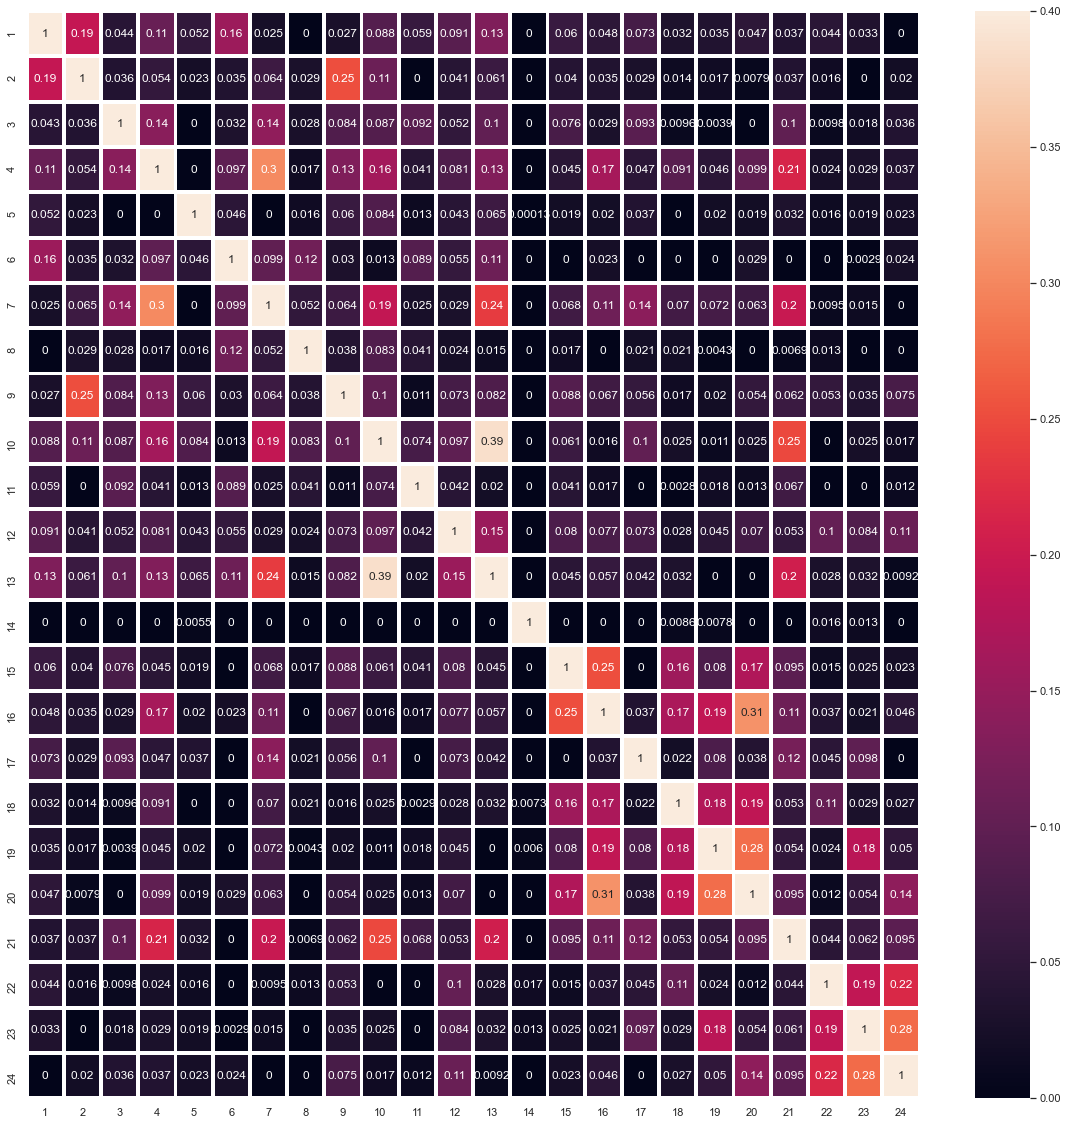

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,linewidths=3, annot=True, vmax=0.4)
# plt.savefig(r'file/cram_v.pdf',dpi = 400)

### 这是一个间隔

In [34]:
G = nx.Graph()
all_member = set(range(1,25))
G.name  = 'Mouse Protein'

In [35]:
gramerVdat = correlation_matrix.values
for i in range(gramerVdat.shape[0]):
    gramerVdat[i,i] = 0
gramerVdat

array([[0.00000000e+00, 1.93338106e-01, 4.35010195e-02, 1.06309138e-01,
        5.20139344e-02, 1.55588396e-01, 2.46767840e-02, 0.00000000e+00,
        2.67800717e-02, 8.79101347e-02, 5.92929983e-02, 9.10876777e-02,
        1.28647687e-01, 0.00000000e+00, 5.98926354e-02, 4.83293824e-02,
        7.33800840e-02, 3.19091623e-02, 3.53031393e-02, 4.71565084e-02,
        3.74044861e-02, 4.42390296e-02, 3.30847474e-02, 0.00000000e+00],
       [1.93153779e-01, 0.00000000e+00, 3.60619701e-02, 5.37084528e-02,
        2.33451696e-02, 3.54036153e-02, 6.44915760e-02, 2.85606535e-02,
        2.52642043e-01, 1.10607020e-01, 0.00000000e+00, 4.07700335e-02,
        6.14329032e-02, 0.00000000e+00, 4.00310715e-02, 3.53469093e-02,
        2.90568779e-02, 1.44692393e-02, 1.74210211e-02, 7.94810799e-03,
        3.74519685e-02, 1.60059564e-02, 0.00000000e+00, 1.96399914e-02],
       [4.34846877e-02, 3.60805414e-02, 0.00000000e+00, 1.38036756e-01,
        0.00000000e+00, 3.17727396e-02, 1.44529136e-01, 2.8070

In [36]:
for i in range(gramerVdat.shape[0]):
    for j in range(i+1,gramerVdat.shape[0]):
        if gramerVdat[i,j]!=0:
            G.add_edge(str(i+1),str(j+1),weight = gramerVdat[i,j])

In [37]:
G.edges

EdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '9'), ('1', '10'), ('1', '11'), ('1', '12'), ('1', '13'), ('1', '15'), ('1', '16'), ('1', '17'), ('1', '18'), ('1', '19'), ('1', '20'), ('1', '21'), ('1', '22'), ('1', '23'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6'), ('2', '7'), ('2', '8'), ('2', '9'), ('2', '10'), ('2', '12'), ('2', '13'), ('2', '15'), ('2', '16'), ('2', '17'), ('2', '18'), ('2', '19'), ('2', '20'), ('2', '21'), ('2', '22'), ('2', '24'), ('3', '4'), ('3', '6'), ('3', '7'), ('3', '8'), ('3', '9'), ('3', '10'), ('3', '11'), ('3', '12'), ('3', '13'), ('3', '15'), ('3', '16'), ('3', '17'), ('3', '18'), ('3', '19'), ('3', '21'), ('3', '22'), ('3', '23'), ('3', '24'), ('4', '6'), ('4', '7'), ('4', '8'), ('4', '9'), ('4', '10'), ('4', '11'), ('4', '12'), ('4', '13'), ('4', '15'), ('4', '16'), ('4', '17'), ('4', '18'), ('4', '19'), ('4', '20'), ('4', '21'), ('4', '22'), ('4', '23'), ('4', '24'), ('5', '6'), ('5', '8'), ('5', '9'), ('

In [38]:
partition = community_louvain.best_partition(G)
print('final_partion:',partition)

status_list: [{'1': 0, '2': 1, '3': 2, '4': 2, '5': 3, '6': 0, '7': 2, '9': 1, '10': 3, '11': 0, '12': 4, '13': 3, '15': 5, '16': 5, '17': 2, '18': 5, '19': 5, '20': 5, '21': 2, '22': 4, '23': 4, '8': 0, '24': 4, '14': 4}]
status_list: [{'1': 0, '2': 1, '3': 2, '4': 2, '5': 3, '6': 0, '7': 2, '9': 1, '10': 3, '11': 0, '12': 4, '13': 3, '15': 5, '16': 5, '17': 2, '18': 5, '19': 5, '20': 5, '21': 2, '22': 4, '23': 4, '8': 0, '24': 4, '14': 4}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 2}]
final_partion: {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '9': 0, '10': 0, '11': 0, '12': 1, '13': 0, '15': 2, '16': 2, '17': 0, '18': 2, '19': 2, '20': 2, '21': 0, '22': 1, '23': 1, '8': 0, '24': 1, '14': 1}


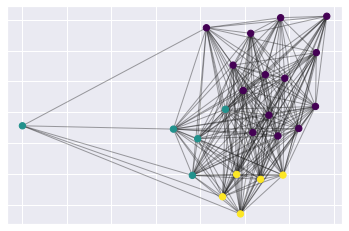

In [39]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.4)
# nx.draw(G)
plt.savefig('file/partion.tiff',dpi = 1000)
plt.show()

In [40]:
community = pd.DataFrame(pd.Series(partition),columns=['com'])
community = community.reset_index().rename(columns={'index':'cat'})
community.set_index(['com','cat'])
community = community.sort_values(by = ['com','cat'])
community = community.set_index(['com','cat'])
community

Empty DataFrame
Columns: []
Index: [(0, 1), (0, 10), (0, 11), (0, 13), (0, 17), (0, 2), (0, 21), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 12), (1, 14), (1, 22), (1, 23), (1, 24), (2, 15), (2, 16), (2, 18), (2, 19), (2, 20)]

### week3

In [30]:
com0 = [1,2,3,4,5,6,7,8,9,10,11,13,17,21]
com1 = [12,14,22,23,24]
com2 = [15,16,18,19,20]

In [31]:
data = pd.read_excel(r'file/vertex_class.xlsx')
data = pd.DataFrame(data)
data = data.fillna(0)
data

,name,lable01,label02,label03,label04,...,label12,label13,label14,label15,label16
0,ENSMUSP00000000001,7,8.0,10.0,21.0,...,0.0,0.0,0.0,0.0,0.0
1,ENSMUSP00000000003,7,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,ENSMUSP00000000010,4,7.0,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0
3,ENSMUSP00000000049,7,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,ENSMUSP00000000058,7,8.0,9.0,10.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9793,ENSMUSP00000114074,1,6.0,7.0,11.0,...,0.0,0.0,0.0,0.0,0.0
9794,ENSMUSP00000114076,3,7.0,10.0,15.0,...,0.0,0.0,0.0,0.0,0.0
9795,ENSMUSP00000114087,21,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
9796,ENSMUSP00000114095,2,7.0,9.0,21.0,...,0.0,0.0,0.0,0.0,0.0


In [32]:
lines = list(pd.DataFrame(pd.read_csv(r'file/mouse_protein_w2v_detailed.csv'))['Class'])
lines

['7\t8\t10\t21\t',
 '7\t9\t',
 '4\t7\t15\t16\t21\t',
 '7\t21\t',
 '7\t8\t9\t10\t21\t',
 '4\t7\t10\t15\t21\t',
 '2\t7\t9\t21\t',
 '4\t7\t19\t21\t',
 '4\t7\t19\t21\t',
 '1\t7\t10\t12\t15\t16\t20\t21\t',
 '7\t10\t15\t16\t21\t',
 '1\t3\t6\t7\t10\t12\t',
 '6\t7\t12\t17\t21\t',
 '1\t7\t10\t15\t21\t',
 '1\t2\t7\t9\t21\t',
 '7\t10\t12\t15\t16\t21\t',
 '3\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '7\t8\t9\t10\t12\t22\t23\t24\t',
 '7\t9\t21\t',
 '1\t7\t12\t13\t15\t19\t20\t21\t',
 '7\t9\t12\t13\t',
 '4\t7\t16\t20\t21\t',
 '7\t18\t21\t',
 '1\t7\t',
 '13\t21\t',
 '9\t10\t12\t21\t',
 '1\t2\t7\t8\t9\t10\t',
 '6\t',
 '3\t4\t7\t15\t21\t',
 '7\t10\t12\t13\t16\t',
 '3\t7\t10\t12\t17\t21\t23\t',
 '7\t12\t17\t20\t21\t23\t24\t',
 '1\t2\t7\t21\t',
 '4\t7\t21\t',
 '7\t',
 '1\t7\t9\t13\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '4\t21\t',
 '1\t21\t',
 '4\t7\t21\t',
 '7\t10\t',
 '20\t',
 '6\t10\t',
 '21\t',
 '6\t16\t18\t22\t23\t24\t',
 '1\t6\t7\t21\t',
 '4\t7\t15\t16\t19\t21\t',
 '6\t7\t21\t',


In [33]:
mouse_detail = pd.read_csv(r'file/mouse_protein_w2v_detailed.csv')
mouse_detail = pd.DataFrame(mouse_detail)
mouse_detail

,Ensembl ID,Class,W1,W2,W3,...,W252,W253,W254,W255,W256
0,ENSMUSP00000000001,7\t8\t10\t21\t,-0.217076,-0.183405,0.092104,...,-0.604842,-0.209316,0.592815,-0.272104,-0.334192
1,ENSMUSP00000000003,7\t9\t,-0.802948,-0.197523,-0.052596,...,0.058482,0.516389,0.316721,0.452829,-0.279975
2,ENSMUSP00000000010,4\t7\t15\t16\t21\t,-0.364400,-0.583910,-0.314320,...,-0.101395,0.775379,0.800322,-0.112055,-0.549560
3,ENSMUSP00000000049,7\t21\t,0.119675,-0.154770,-0.019872,...,-0.069383,-0.065432,0.384042,-0.271387,-0.339185
4,ENSMUSP00000000058,7\t8\t9\t10\t21\t,-0.107822,-0.041106,-0.012867,...,0.016145,0.122560,0.234350,0.000983,-0.052527
...,...,...,...,...,...,...,...,...,...,...,...
9650,ENSMUSP00000114074,1\t6\t7\t11\t15\t21\t,-0.459444,-0.549114,-0.308382,...,-0.012653,0.172875,0.686005,-0.172364,-0.169167
9651,ENSMUSP00000114076,3\t7\t10\t15\t21\t,-0.274740,-0.137861,-0.138600,...,0.418779,0.025525,0.205481,0.101298,-0.317509
9652,ENSMUSP00000114087,21\t,-0.042372,-0.113715,0.049042,...,0.015941,0.157916,0.068437,-0.144267,-0.032781
9653,ENSMUSP00000114095,2\t7\t9\t21\t,0.001003,0.001866,0.001190,...,0.001260,-0.000560,0.000278,0.001227,-0.000430


In [34]:
list0 = []
list1 = []
list2 = []
for line in lines:
    line = line.split('\t')
    del line[-1]
    for i in range(len(line)):
        line[i] = int(line[i])
    str0 = ''
    str1 = ''
    str2 = ''
    for ele in line:
        if ele in com0:
            str0 = str0 + str(ele) + '\t'
            continue
        if ele in com1:
            str1 = str1 + str(ele) + '\t'
            continue
        if ele in com2:
            str2 = str2 + str(ele) + '\t'
            continue
    list0.append(str0 if str0!='' else '0\t')
    list1.append(str1 if str1!='' else '0\t')
    list2.append(str2 if str2!='' else '0\t')

print(list0)
print(list1)
print(list2)

['7\t8\t10\t21\t', '7\t9\t', '4\t7\t21\t', '7\t21\t', '7\t8\t9\t10\t21\t', '4\t7\t10\t21\t', '2\t7\t9\t21\t', '4\t7\t21\t', '4\t7\t21\t', '1\t7\t10\t21\t', '7\t10\t21\t', '1\t3\t6\t7\t10\t', '6\t7\t17\t21\t', '1\t7\t10\t21\t', '1\t2\t7\t9\t21\t', '7\t10\t21\t', '3\t21\t', '7\t10\t13\t21\t', '7\t10\t13\t21\t', '7\t8\t9\t10\t', '7\t9\t21\t', '1\t7\t13\t21\t', '7\t9\t13\t', '4\t7\t21\t', '7\t21\t', '1\t7\t', '13\t21\t', '9\t10\t21\t', '1\t2\t7\t8\t9\t10\t', '6\t', '3\t4\t7\t21\t', '7\t10\t13\t', '3\t7\t10\t17\t21\t', '7\t17\t21\t', '1\t2\t7\t21\t', '4\t7\t21\t', '7\t', '1\t7\t9\t13\t21\t', '7\t10\t13\t21\t', '4\t21\t', '1\t21\t', '4\t7\t21\t', '7\t10\t', '0\t', '6\t10\t', '21\t', '6\t', '1\t6\t7\t21\t', '4\t7\t21\t', '6\t7\t21\t', '1\t4\t7\t10\t13\t17\t21\t', '7\t9\t21\t', '6\t7\t8\t10\t21\t', '3\t6\t17\t21\t', '3\t7\t21\t', '8\t', '7\t9\t10\t21\t', '1\t6\t7\t8\t10\t21\t', '9\t10\t21\t', '21\t', '7\t10\t21\t', '4\t7\t21\t', '6\t7\t17\t21\t', '4\t7\t8\t10\t21\t', '1\t8\t13\t21\t', '9\t', '

In [35]:
mouse_detail['Par0'] = pd.Series(list0)
mouse_detail.to_csv(r'file/mouse_detail_Par0.csv',index = False)
mouse_detail = mouse_detail.drop('Par0',axis = 1)

In [36]:
mouse_detail['Par1'] = pd.Series(list1)
mouse_detail.to_csv(r'file/mouse_detail_Par1.csv',index = False)
mouse_detail = mouse_detail.drop('Par1',axis = 1)

In [37]:
mouse_detail['Par2'] = pd.Series(list2)
mouse_detail.to_csv(r'file/mouse_detail_Par2.csv',index = False)
mouse_detail = mouse_detail.drop('Par2',axis = 1)

### week4

### 数据处理部分

In [38]:
par0 = pd.read_csv(r'file/mouse_detail_Par2.csv')
par0 = pd.DataFrame(par0)
par0

,Ensembl ID,Class,W1,W2,W3,...,W253,W254,W255,W256,Par2
0,ENSMUSP00000000001,7\t8\t10\t21\t,-0.217076,-0.183405,0.092104,...,-0.209316,0.592815,-0.272104,-0.334192,0\t
1,ENSMUSP00000000003,7\t9\t,-0.802948,-0.197523,-0.052596,...,0.516389,0.316721,0.452829,-0.279975,0\t
2,ENSMUSP00000000010,4\t7\t15\t16\t21\t,-0.364400,-0.583910,-0.314320,...,0.775379,0.800322,-0.112055,-0.549560,15\t16\t
3,ENSMUSP00000000049,7\t21\t,0.119675,-0.154770,-0.019872,...,-0.065432,0.384042,-0.271387,-0.339185,0\t
4,ENSMUSP00000000058,7\t8\t9\t10\t21\t,-0.107822,-0.041106,-0.012867,...,0.122560,0.234350,0.000983,-0.052527,0\t
...,...,...,...,...,...,...,...,...,...,...,...
9650,ENSMUSP00000114074,1\t6\t7\t11\t15\t21\t,-0.459444,-0.549114,-0.308382,...,0.172875,0.686005,-0.172364,-0.169167,15\t
9651,ENSMUSP00000114076,3\t7\t10\t15\t21\t,-0.274740,-0.137861,-0.138600,...,0.025525,0.205481,0.101298,-0.317509,15\t
9652,ENSMUSP00000114087,21\t,-0.042372,-0.113715,0.049042,...,0.157916,0.068437,-0.144267,-0.032781,0\t
9653,ENSMUSP00000114095,2\t7\t9\t21\t,0.001003,0.001866,0.001190,...,-0.000560,0.000278,0.001227,-0.000430,0\t


In [39]:
new_col = com2
data = np.zeros([par0.shape[0],len(new_col)])
newFrame = pd.DataFrame()
list0 = list(par0['Par2'])
list0 = [i.split('\t')[0:-1] for i in list0]

In [40]:
for i in range(len(list0)):
    for j in list0[i]:
        newFrame.loc[i,j] = 1
data

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [41]:
newFrame = newFrame.fillna(0)
newFrame = pd.DataFrame(newFrame,dtype='int32')
del newFrame['0']
newFrame

,15,16,19,20,18
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
9650,1,0,0,0,0
9651,1,0,0,0,0
9652,0,0,0,0,0
9653,0,0,0,0,0


In [42]:
par0 = par0.join(newFrame)

In [66]:
par0.to_csv(r'file/par2.csv',index = False)

### week5

In [11]:
data = pd.read_csv(r'F:\project\source_code\code2\file\mouse_protein_w2v_detailed.csv')

In [12]:
data

,Ensembl ID,Class,W1,W2,W3,...,W252,W253,W254,W255,W256
0,ENSMUSP00000000001,7\t8\t10\t21\t,-0.217076,-0.183405,0.092104,...,-0.604842,-0.209316,0.592815,-0.272104,-0.334192
1,ENSMUSP00000000003,7\t9\t,-0.802948,-0.197523,-0.052596,...,0.058482,0.516389,0.316721,0.452829,-0.279975
2,ENSMUSP00000000010,4\t7\t15\t16\t21\t,-0.364400,-0.583910,-0.314320,...,-0.101395,0.775379,0.800322,-0.112055,-0.549560
3,ENSMUSP00000000049,7\t21\t,0.119675,-0.154770,-0.019872,...,-0.069383,-0.065432,0.384042,-0.271387,-0.339185
4,ENSMUSP00000000058,7\t8\t9\t10\t21\t,-0.107822,-0.041106,-0.012867,...,0.016145,0.122560,0.234350,0.000983,-0.052527
...,...,...,...,...,...,...,...,...,...,...,...
9650,ENSMUSP00000114074,1\t6\t7\t11\t15\t21\t,-0.459444,-0.549114,-0.308382,...,-0.012653,0.172875,0.686005,-0.172364,-0.169167
9651,ENSMUSP00000114076,3\t7\t10\t15\t21\t,-0.274740,-0.137861,-0.138600,...,0.418779,0.025525,0.205481,0.101298,-0.317509
9652,ENSMUSP00000114087,21\t,-0.042372,-0.113715,0.049042,...,0.015941,0.157916,0.068437,-0.144267,-0.032781
9653,ENSMUSP00000114095,2\t7\t9\t21\t,0.001003,0.001866,0.001190,...,0.001260,-0.000560,0.000278,0.001227,-0.000430


In [14]:
class_ser = list(data['Class'])
class_ser

['7\t8\t10\t21\t',
 '7\t9\t',
 '4\t7\t15\t16\t21\t',
 '7\t21\t',
 '7\t8\t9\t10\t21\t',
 '4\t7\t10\t15\t21\t',
 '2\t7\t9\t21\t',
 '4\t7\t19\t21\t',
 '4\t7\t19\t21\t',
 '1\t7\t10\t12\t15\t16\t20\t21\t',
 '7\t10\t15\t16\t21\t',
 '1\t3\t6\t7\t10\t12\t',
 '6\t7\t12\t17\t21\t',
 '1\t7\t10\t15\t21\t',
 '1\t2\t7\t9\t21\t',
 '7\t10\t12\t15\t16\t21\t',
 '3\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '7\t8\t9\t10\t12\t22\t23\t24\t',
 '7\t9\t21\t',
 '1\t7\t12\t13\t15\t19\t20\t21\t',
 '7\t9\t12\t13\t',
 '4\t7\t16\t20\t21\t',
 '7\t18\t21\t',
 '1\t7\t',
 '13\t21\t',
 '9\t10\t12\t21\t',
 '1\t2\t7\t8\t9\t10\t',
 '6\t',
 '3\t4\t7\t15\t21\t',
 '7\t10\t12\t13\t16\t',
 '3\t7\t10\t12\t17\t21\t23\t',
 '7\t12\t17\t20\t21\t23\t24\t',
 '1\t2\t7\t21\t',
 '4\t7\t21\t',
 '7\t',
 '1\t7\t9\t13\t21\t',
 '7\t10\t12\t13\t15\t21\t',
 '4\t21\t',
 '1\t21\t',
 '4\t7\t21\t',
 '7\t10\t',
 '20\t',
 '6\t10\t',
 '21\t',
 '6\t16\t18\t22\t23\t24\t',
 '1\t6\t7\t21\t',
 '4\t7\t15\t16\t19\t21\t',
 '6\t7\t21\t',


In [35]:
code_mat = np.zeros([data.shape[0],24])
code_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
for line,i in enumerate(class_ser):
    list = i.split('\t')[:-1]
    for num in list:
        code_mat[line,int(num)-1] = 1
code_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
col = ['cat'+ str(i) for i in range(1,25)]
col
code_frame = pd.DataFrame(data=code_mat,dtype='int32',columns = col)
code_frame

,cat1,cat2,cat3,cat4,cat5,...,cat20,cat21,cat22,cat23,cat24
0,0,0,0,0,0,...,0,1,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,1,0,...,0,1,0,0,0
3,0,0,0,0,0,...,0,1,0,0,0
4,0,0,0,0,0,...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9650,1,0,0,0,0,...,0,1,0,0,0
9651,0,0,1,0,0,...,0,1,0,0,0
9652,0,0,0,0,0,...,0,1,0,0,0
9653,0,1,0,0,0,...,0,1,0,0,0


In [55]:
code_frame.to_csv(r'file/code_frame.csv',index = False)